In [1]:
import pandas as pd
import glob
import os
import geopandas as gpd
from os.path import join

In [2]:
carpeta = "data/RSH 2016 - 2021/*.csv"
codigos_comunales = pd.read_csv(join("data", "codigos_comunales.csv"))
dict_mapas = {}
for ruta_archivo in glob.glob(carpeta):
    df = pd.read_csv(ruta_archivo)
    nombre_archivo = os.path.basename(ruta_archivo).split(".")[0]
    df.columns = [
    "codigo comuna",
    "hogares tramo 0 - 40",
    "hogares tramo 41 - 50",
    "hogares tramo 51 - 60",
    "hogares tramo 61 - 70",
    "hogares tramo 71 - 80",
    "hogares tramo 81 - 90",
    "hogares tramo 91 - 100",
    "total hogares"
]
    df = df.astype(int)
    df_final = pd.merge(df, codigos_comunales, how="right", on="codigo comuna")

    df_pobreza = df_final[["codigo comuna", "nombre comuna", "hogares tramo 0 - 40"]]
    df_pobreza["prc tramo 0 - 40"] = df_final["hogares tramo 0 - 40"] / df_final["total hogares"]
    df_pobreza.sort_values("prc tramo 0 - 40", inplace=True, ignore_index=True)

    df_riqueza = df_final[["codigo comuna", "nombre comuna", "hogares tramo 71 - 80", "hogares tramo 81 - 90", "hogares tramo 91 - 100"]]
    df_riqueza["prc tramos altos"] = (df_final["hogares tramo 71 - 80"] + \
                                      df_final["hogares tramo 81 - 90"] + \
                                      df_final["hogares tramo 91 - 100"]) / df_final["total hogares"]
    df_riqueza.sort_values("prc tramos altos", inplace=True, ignore_index=True)

    mapa: gpd.GeoDataFrame = gpd.read_file(join("data", "r13.geojson"))
    mapa["codigo_comuna"] = mapa["codigo_comuna"].astype(int)
    mapa = mapa.dissolve("codigo_comuna")
    mapa = pd.merge(mapa, df_pobreza[["codigo comuna", "prc tramo 0 - 40"]], how="left", left_index=True, right_on="codigo comuna")
    mapa = pd.merge(mapa, df_riqueza[["codigo comuna", "prc tramos altos", "nombre comuna"]], how="left", on="codigo comuna")

    dict_mapas[nombre_archivo.split("_")[3]] = mapa

    

/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_60557/287549918.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pobreza["prc tramo 0 - 40"] = df_final["hogares tramo 0 - 40"] / df_final["total hogares"]
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_60557/287549918.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pobreza.sort_values("prc tramo 0 - 40", inplace=True, ignore_index=True)
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_60557/287549918.py:26: SettingWithCopyWarning: 
A value is trying to be set on a cop

Text(0.5, 1.0, 'Porcentaje de hogares en tramo CSE 0% - 40% del año 2016')

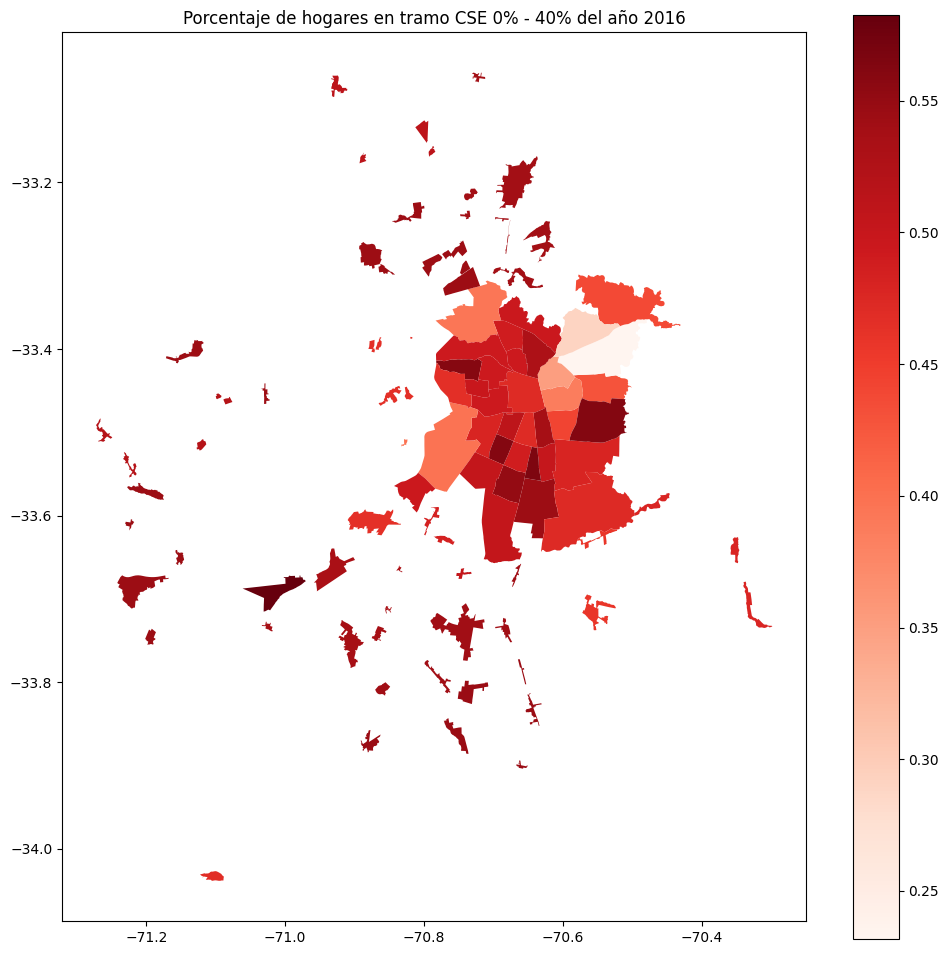

In [3]:
mapa = dict_mapas["201606"]
mapa.plot(
    column = "prc tramo 0 - 40",
    cmap = "Reds",
    legend = True,
    figsize = (12, 12)
).set_title("Porcentaje de hogares en tramo CSE 0% - 40% del año 2016")


Text(0.5, 1.0, 'Porcentaje de hogares en tramo CSE 70% - 100% del año 2016')

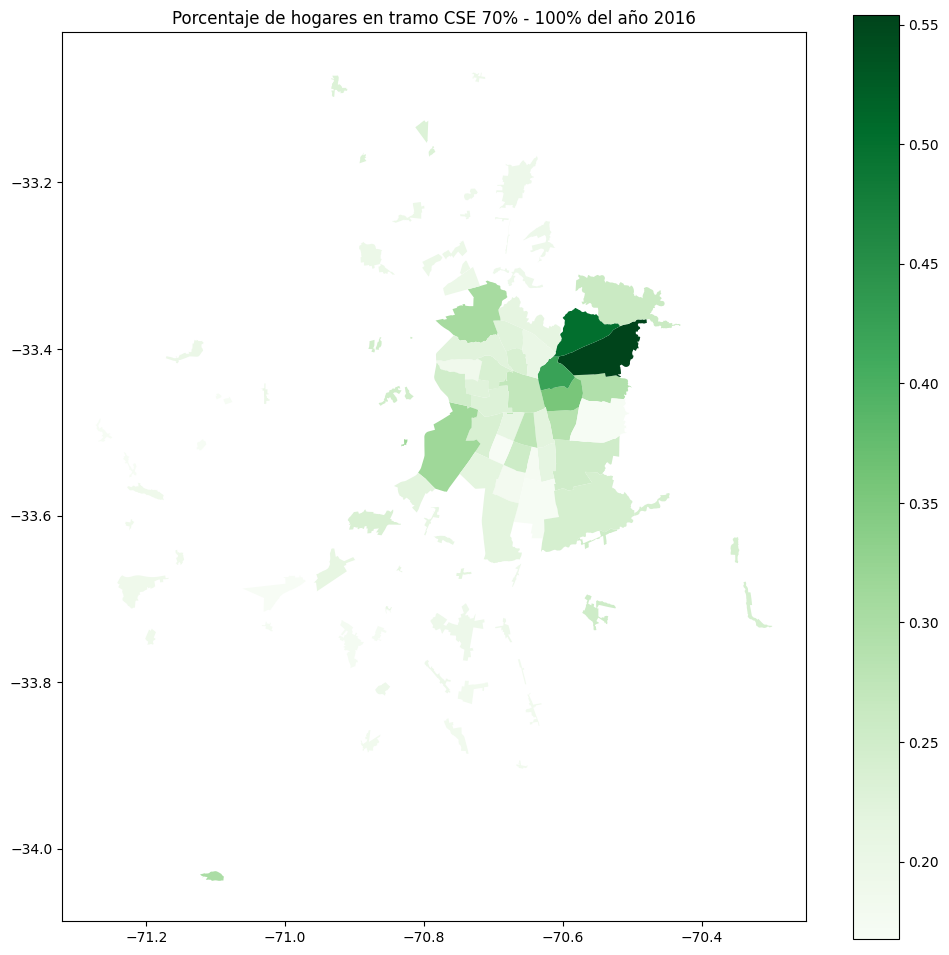

In [4]:
mapa.plot(
    column = "prc tramos altos",
    cmap = "Greens",
    legend = True,
    figsize = (12, 12)
).set_title("Porcentaje de hogares en tramo CSE 70% - 100% del año 2016")

Text(0.5, 1.0, 'Porcentaje de hogares en tramo CSE 0% - 40% del año 2017')

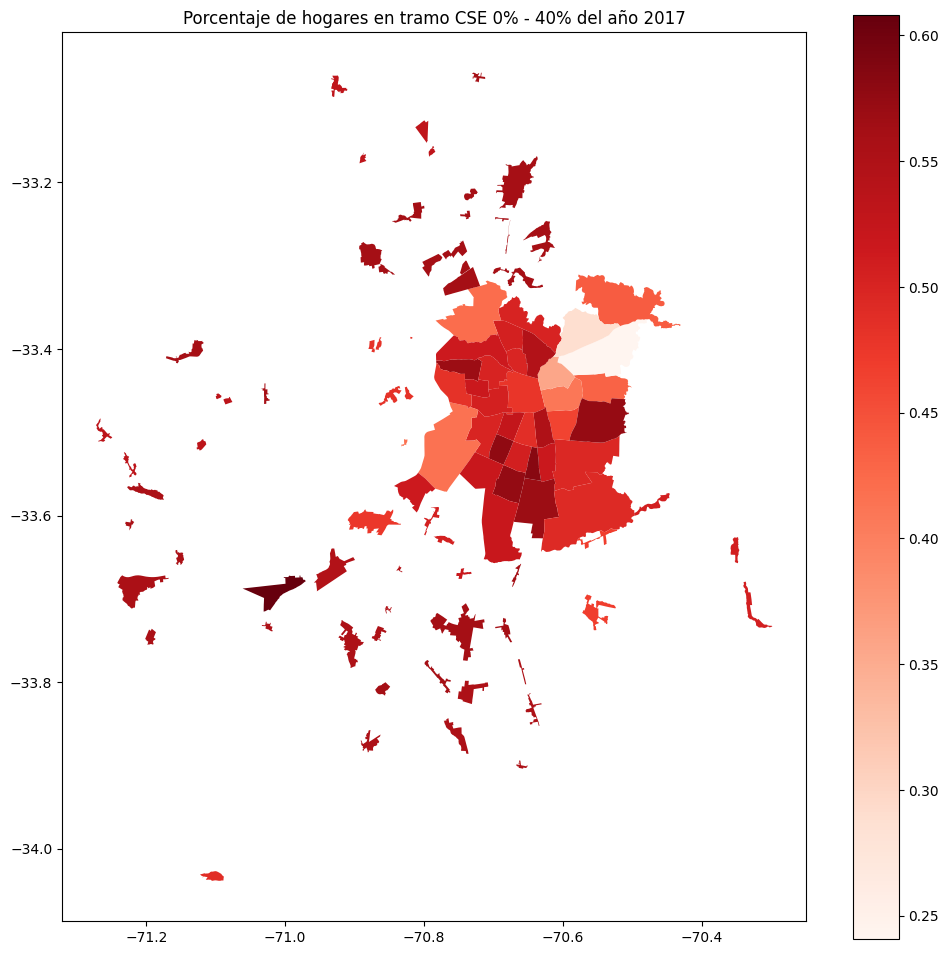

In [5]:
mapa = dict_mapas["201706"]
mapa.plot(
    column = "prc tramo 0 - 40",
    cmap = "Reds",
    legend = True,
    figsize = (12, 12)
).set_title("Porcentaje de hogares en tramo CSE 0% - 40% del año 2017")

Text(0.5, 1.0, 'Porcentaje de hogares en tramo CSE 70% - 100% del año 2017')

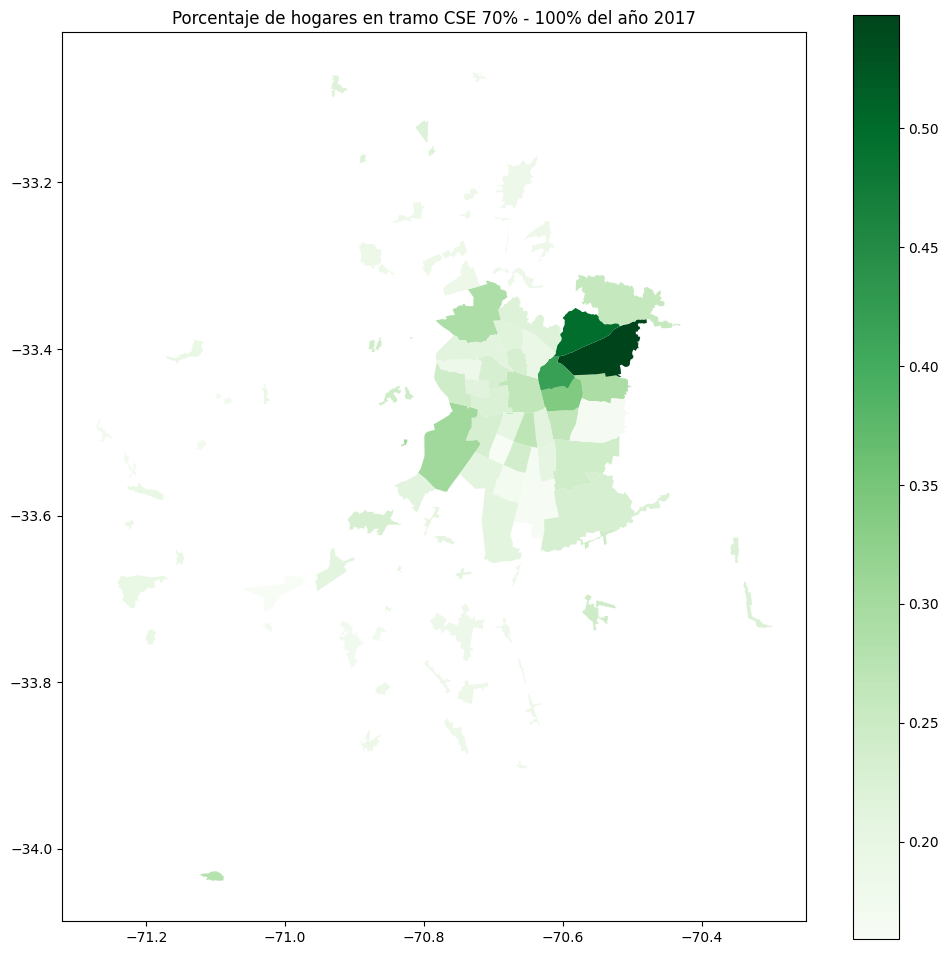

In [6]:
mapa.plot(
    column = "prc tramos altos",
    cmap = "Greens",
    legend = True,
    figsize = (12, 12)
).set_title("Porcentaje de hogares en tramo CSE 70% - 100% del año 2017")

In [8]:
dict_mapas

{'201706':                                              geometry    geocodigo  \
 0   POLYGON ((-70.68067 -33.47653, -70.67957 -33.4...  13101091001   
 1   POLYGON ((-70.73986 -33.51009, -70.73799 -33.5...  13102041003   
 2   POLYGON ((-70.74671 -33.42994, -70.74814 -33.4...  13103081001   
 3   POLYGON ((-70.6891 -33.3912, -70.68971 -33.389...  13104081001   
 4   POLYGON ((-70.69214 -33.57642, -70.6953 -33.57...  13105021001   
 5   POLYGON ((-70.70752 -33.48097, -70.70895 -33.4...  13106111003   
 6   POLYGON ((-70.644 -33.36815, -70.64378 -33.367...  13107011007   
 7   POLYGON ((-70.6705 -33.4263, -70.67131 -33.426...  13108051001   
 8   POLYGON ((-70.6852 -33.53913, -70.6853 -33.539...  13109021001   
 9   POLYGON ((-70.61135 -33.55886, -70.61224 -33.5...  13110011004   
 10  POLYGON ((-70.63115 -33.55808, -70.63207 -33.5...  13111051002   
 11  POLYGON ((-70.6265 -33.61481, -70.62641 -33.61...  13112041002   
 12  POLYGON ((-70.5654 -33.46146, -70.56718 -33.46...  13113051001

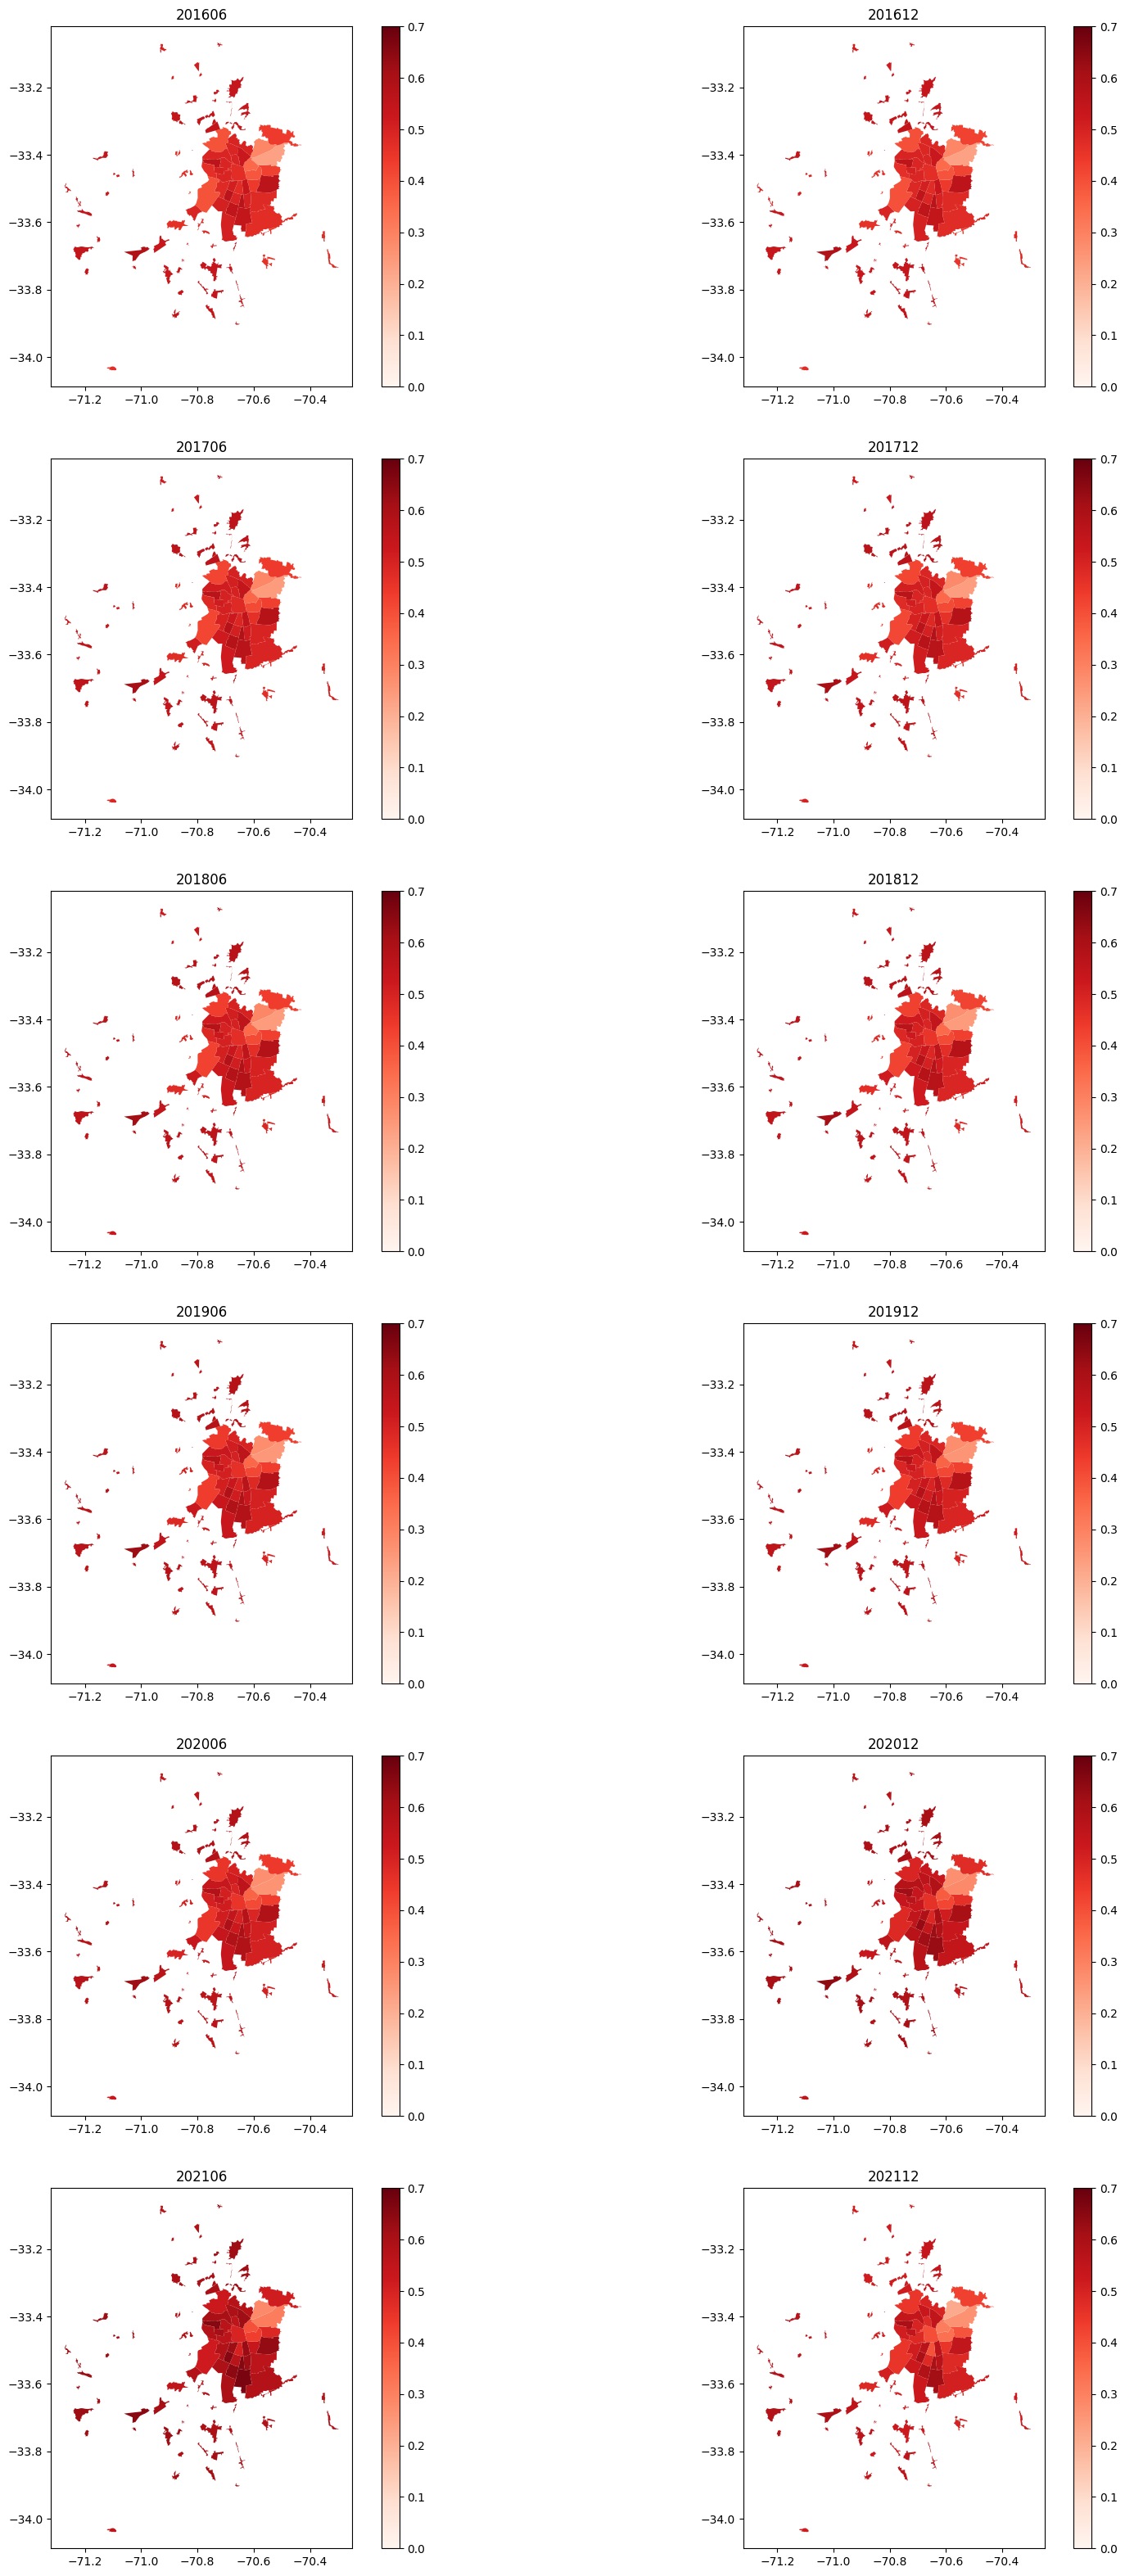

In [27]:
import matplotlib.pyplot as plt

keys_list = list(dict_mapas.keys())
keys_list.sort()

fig, axes = plt.subplots(6, 2)
fig.set_size_inches(20, 40)
i, j = 0, 0
for key in keys_list:
    dict_mapas[key].plot(
        column = "prc tramo 0 - 40",
        cmap = "Reds",
        legend = True,
        figsize = (12, 12),
        ax=axes[i][j],
        vmin = 0,
        vmax = 0.7
    )
    axes[i][j].set_title(key)
    if j == 0:
        j += 1
    else:
        j = 0
        i += 1

In [29]:
dict_mapas["201606"]

,geometry,geocodigo,codigo_provincia,codigo_region,codigo comuna,prc tramo 0 - 40,prc tramos altos,nombre comuna
0,"POLYGON ((-70.68067 -33.47653, -70.67957 -33.4...",13101091001,131,13,13101,0.470504,0.270752,Santiago
1,"POLYGON ((-70.73986 -33.51009, -70.73799 -33.5...",13102041003,131,13,13102,0.479563,0.238433,Cerrillos
2,"POLYGON ((-70.74671 -33.42994, -70.74814 -33.4...",13103081001,131,13,13103,0.559524,0.188139,Cerro Navia
3,"POLYGON ((-70.6891 -33.3912, -70.68971 -33.389...",13104081001,131,13,13104,0.490279,0.223667,Conchalí
4,"POLYGON ((-70.69214 -33.57642, -70.6953 -33.57...",13105021001,131,13,13105,0.550956,0.178532,El Bosque
5,"POLYGON ((-70.70752 -33.48097, -70.70895 -33.4...",13106111003,131,13,13106,0.492369,0.229293,Estación Central
6,"POLYGON ((-70.644 -33.36815, -70.64378 -33.367...",13107011007,131,13,13107,0.495685,0.213025,Huechuraba
7,"POLYGON ((-70.6705 -33.4263, -70.67131 -33.426...",13108051001,131,13,13108,0.492267,0.238355,Independencia
8,"POLYGON ((-70.6852 -33.53913, -70.6853 -33.539...",13109021001,131,13,13109,0.489482,0.254981,La Cisterna
9,"POLYGON ((-70.61135 -33.55886, -70.61224 -33.5...",13110011004,131,13,13110,0.479420,0.251228,La Florida


In [ ]:
df_sj = pd.DataFrame({"year": [], "prc tramo 0 - 40": []})
for key in keys_list:
    ano = float(key[0:4]) + float(key[4:]) / 12
    sj = dict_mapas[key][dict_mapas[key]["codigo comuna"] == 13129]
    df_provisorio = pd.DataFrame({"year": [ano], "prc tramo 0 - 40": [float(sj["prc tramo 0 - 40"])]})
    df_sj = pd.concat((df_sj, df_provisorio), axis="index", ignore_index=True)

df_sj

/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_60557/979172132.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], "prc tramo 0 - 40": [float(sj["prc tramo 0 - 40"])]})
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_60557/979172132.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], "prc tramo 0 - 40": [float(sj["prc tramo 0 - 40"])]})
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_60557/979172132.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], "prc tramo 0 - 40": [float(sj["prc tramo 0 - 40"])]})
/var/folders/ym/46w6_4ls4

,year,prc tramo 0 - 40
0,2016.5,0.536189
1,2017.0,0.533027
2,2017.5,0.550023
3,2018.0,0.545904
4,2018.5,0.556388
5,2019.0,0.556031
6,2019.5,0.564600
7,2020.0,0.563255
8,2020.5,0.576718
9,2021.0,0.604832


In [43]:
import statsmodels.api as sm

y = df_sj["prc tramo 0 - 40"]
x = df_sj["year"]

X = sm.add_constant(x)

linear_sj = sm.OLS(y, X).fit()

beta_0, beta_1 = linear_sj.params
beta_0, beta_1

(-23.377964182211898, 0.011857193917595113)

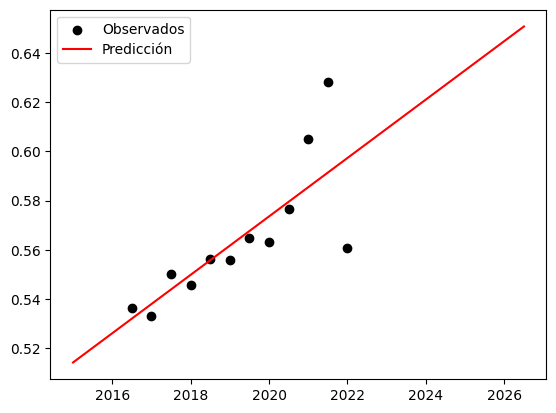

In [59]:
import numpy as np

x_ticks = np.arange(start=2015, stop=2027, step=0.5)
y_ticks = beta_0 + beta_1 * x_ticks

fig, ax = plt.subplots(1, 1)
ax.scatter(
    x = [float(key[0:4]) + float(key[4:]) / 12 for key in keys_list],
    y = df_sj["prc tramo 0 - 40"],
    label = "Observados",
    color = "black"
)
ax.plot(
    x_ticks,
    y_ticks,
    label = "Predicción",
    color = "red"
)
ax.legend()

In [68]:
comunas = list(dict_mapas["201606"]["nombre comuna"])

def df_comuna(nombre_comuna):
    df = pd.DataFrame({"year": [], "prc tramo 0 - 40": []})
    for key in keys_list:
        ano = float(key[0:4]) + float(key[4:]) / 12
        com = dict_mapas[key][dict_mapas[key]["nombre comuna"] == nombre_comuna]
        df_provisorio = pd.DataFrame({"year": [ano], "prc tramo 0 - 40": [float(com["prc tramo 0 - 40"])]})
        df = pd.concat((df, df_provisorio), axis="index", ignore_index=True)
    return df

def linear_comuna(nombre_comuna):
    df_com = df_comuna(nombre_comuna)
    y = df_com["prc tramo 0 - 40"]
    x = df_com["year"]
    x = sm.add_constant(x)
    return sm.OLS(y, x).fit()

def plot_comuna(nombre_comuna, ax):
    df_com = df_comuna(nombre_comuna)
    linear_com = linear_comuna(nombre_comuna)
    beta_0, beta_1 = linear_com.params
    x_ticks = np.arange(start=2015, stop=2027, step=0.5)
    y_ticks = beta_0 + beta_1 * x_ticks
    ax.set_title(nombre_comuna)
    ax.scatter(
        x = df_com["year"],
        y = df_com["prc tramo 0 - 40"],
        label = "Observados",
        color = "black"
    )
    ax.plot(
        x_ticks,
        y_ticks,
        label = "Predicción",
        color = "red"
    )
    ax.legend()

len(comunas)

51

Santiago
Cerrillos
Cerro Navia
Conchalí
El Bosque
Estación Central
Huechuraba
Independencia
La Cisterna
La Florida
La Granja
La Pintana
La Reina
Las Condes
Lo Barnechea
Lo Espejo
Lo Prado
Macul
Maipú
Nuñoa
Pedro Aguirre Cerda
Peñalolén
Providencia
Pudahuel
Quilicura
Quinta Normal
Recoleta
Renca
San Joaquín
San Miguel
San Ramón
Vitacura
Puente Alto
Pirque
San José de Maipo
Colina
Lampa
Tiltil
San Bernardo
Buin
Calera de Tango
Paine
Melipilla
Alhué
Curacaví
María Pinto
Talagante
El Monte
Isla de Maipo
Padre Hurtado
Peñaflor


/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_60557/2662319061.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], "prc tramo 0 - 40": [float(com["prc tramo 0 - 40"])]})
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_60557/2662319061.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], "prc tramo 0 - 40": [float(com["prc tramo 0 - 40"])]})
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_60557/2662319061.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], "prc tramo 0 - 40": [float(com["prc tramo 0 - 40"])]})
/var/folders/ym/46w

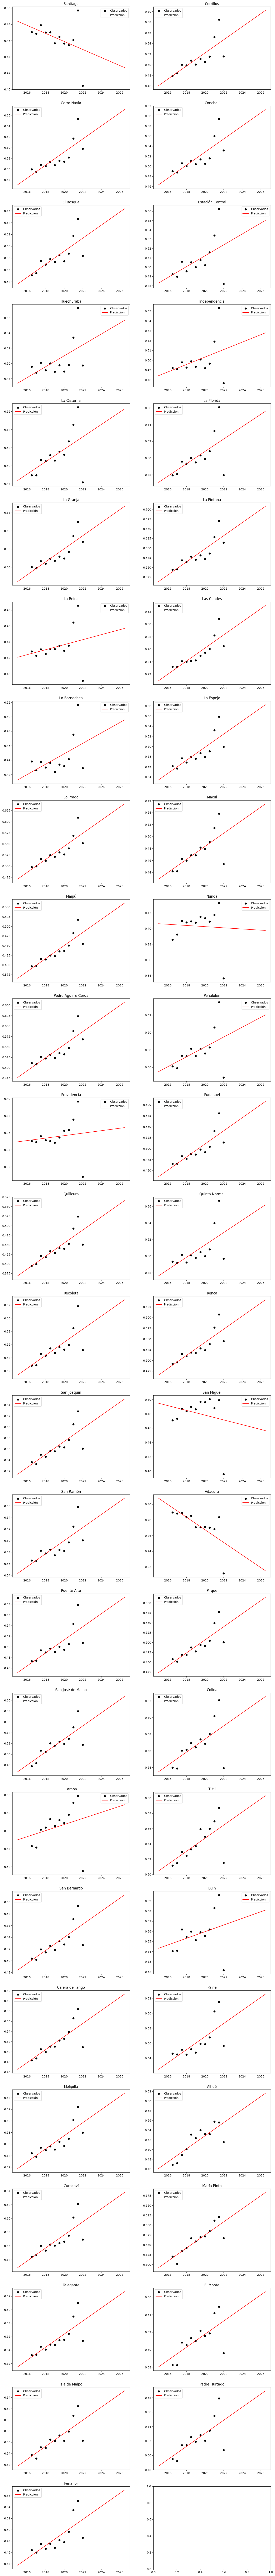

In [69]:
fig, axes = plt.subplots(26, 2)
fig.set_size_inches(16, 160)

i, j = 0, 0
for comuna in comunas:
    print(comuna)
    plot_comuna(comuna, axes[i][j])
    if j == 0:
        j += 1
    else:
        j = 0
        i += 1